In [1]:

from pytket.circuit import Circuit, fresh_symbol
from pytket.circuit.display import render_circuit_jupyter
from pytket.extensions.quantinuum import QuantinuumBackend
import matplotlib.pyplot as pl

import os
print(os.getcwd())

from pytket.extensions.qiskit import qiskit_to_tk, AerBackend
from pytket.backends.backendresult import BackendResult

import qiskit as qk

import pickle
import pandas as pd
import numpy as np

/Users/utkarshagrawal/Documents/Postdoc/U_1_exp/Quantinum/Weak measurements


In [2]:
from sep_decoder_2 import collect_dep_data

ModuleNotFoundError: No module named 'sep_decoder_2'

In [4]:
machine = 'H1-1E'
backend = QuantinuumBackend(machine)
# backend.login()

print(machine, "status:", backend.device_state(device_name=machine))

H1-1E status: online


In [5]:
handle_file = "data/emulator_batch_L=6_shots=50"
with open(handle_file,'rb') as f:
    handle_dict = pickle.load(f)

In [6]:
[backend.circuit_status(handle) for handle in handle_dict.values()]

[CircuitStatus(status=<StatusEnum.COMPLETED: 'Circuit has completed. Results are ready.'>, message='{"name": "circuit-20509", "submit-date": "2023-01-05T18:58:09.037442", "result-date": "2023-01-05T18:59:25.379123", "queue-position": null, "cost": "18.97", "error": null}', error_detail=None, completed_time=None, queued_time=None, submitted_time=None, running_time=None, cancelled_time=None, error_time=None, queue_position=None),
 CircuitStatus(status=<StatusEnum.COMPLETED: 'Circuit has completed. Results are ready.'>, message='{"name": "circuit-24109", "submit-date": "2023-01-05T18:58:09.325107", "result-date": "2023-01-05T18:59:45.190671", "queue-position": null, "cost": "18.95", "error": null}', error_detail=None, completed_time=None, queued_time=None, submitted_time=None, running_time=None, cancelled_time=None, error_time=None, queue_position=None),
 CircuitStatus(status=<StatusEnum.COMPLETED: 'Circuit has completed. Results are ready.'>, message='{"name": "circuit-26509", "submit-da

In [6]:
## This was used to get the result ##

# ## Get results from handle list
# result_dict = {}
# for param,handle in handle_dict.items():
#     result_dict[param] = backend.get_result(handle=handle).to_dict()

# result_file = "data/result_batch_L=6_shots=50"
# with open(result_file,'wb') as f:
#     pickle.dump(result_dict,f)

In [7]:
result_file = "data/result_batch_L=6_shots=50"
with open(result_file,'rb') as f:
    result_dict = pickle.load(f)

In [8]:
results = {param:BackendResult.from_dict(result_dict[param]) for param in result_dict}

In [9]:
results.keys()

dict_keys([(6, 6, 0.624, 2), (6, 6, 0.73, 3), (6, 6, 0.783, 3), (6, 6, 0.73, 2), (6, 6, 0.836, 2), (6, 6, 0.677, 2), (6, 6, 0.783, 2), (6, 6, 0.624, 3), (6, 6, 0.677, 3), (6, 6, 0.836, 3)])

In [41]:

keys=list(results[(6, 6, 0.624, 2)].get_counts().keys())
print(np.array(list(reversed(keys[0]))).reshape((6,6)))
results[(6, 6, 0.624, 2)].get_counts()[keys[0]]

[c5[5], c5[4], c5[3], c5[2], c5[1], c5[0], c4[5], c4[4], c4[3], c4[2], c4[1], c4[0], c3[5], c3[4], c3[3], c3[2], c3[1], c3[0], c2[5], c2[4], c2[3], c2[2], c2[1], c2[0], c1[5], c1[4], c1[3], c1[2], c1[1], c1[0], c0[5], c0[4], c0[3], c0[2], c0[1], c0[0]]
[[0 0 1 0 0 1]
 [0 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]


1

In [43]:
temp = list(reversed(results[(6, 6, 0.624, 2)].get_bitlist()))
np.array(temp).reshape((6,6))

array([[c0[0], c0[1], c0[2], c0[3], c0[4], c0[5]],
       [c1[0], c1[1], c1[2], c1[3], c1[4], c1[5]],
       [c2[0], c2[1], c2[2], c2[3], c2[4], c2[5]],
       [c3[0], c3[1], c3[2], c3[3], c3[4], c3[5]],
       [c4[0], c4[1], c4[2], c4[3], c4[4], c4[5]],
       [c5[0], c5[1], c5[2], c5[3], c5[4], c5[5]]], dtype=object)

In [4]:
# def outcome_results(result,L,depth):
#     measurement_dic = result.get_counts()
#     # measurement_dic = {measurements in a shot:number of occurances}

#     outcome_list = []

#     for data,N in measurement_dic.items(): # data is measurement outcome in a shot
#         data = list(reversed(data)) 
#         # we are reversing the data because quantinuum backend gives result in decending order of time. Whereas the sep_decoder takes input in ascending order
#         data = np.array(data).reshape((depth,L))
#         outcome_list.append((data,N))

#     return outcome_list

def outcome_results(result,L,depth):
    bitlist = result.get_bitlist()
    measurement_dic = result.get_counts(cbits=bitlist)
    # measurement_dic = {measurements in a shot:number of occurances}

    outcome_list = []

    for data,N in measurement_dic.items(): # data is measurement outcome in a shot
        data = list(reversed(data)) 
        # we are reversing the data because quantinuum backend gives result in decending order of time. Whereas the sep_decoder takes input in ascending order
        data = np.array(data,dtype=int).reshape((depth,L))
        data = 2*data - 1
        outcome_list.append((data,N))

    return outcome_list 

In [54]:
# # Already collected data. Don't run again!

# ## Get outcome data from the quantinuum emulator results

# noisy_label = '_noisy'
# filedir = 'data/emulator_data/measurement_data_all_qubits' + noisy_label 

    
# for param, result in results.items():
#     L,depth,p,Q = param
#     if int(depth/L) == 1:
#         depth_label = ''
#     else:
#         depth_label = "_depth_ratio="+str(int(depth/L))
    
#     outcome_filedir = filedir + depth_label + '/'
#     if not os.path.isdir(outcome_filedir):
#         os.makedirs(outcome_filedir)
    
#     outcome_file = outcome_filedir + '/L='+str(L)+'_depth='+str(depth)+'_Q='+str(Q)+'_p=' + str(p)+ '_seed='+str(1)
    
#     if os.path.isfile(outcome_file):
#         with open(outcome_file,'rb') as f:
#             outcomes = pickle.load(f)
#     else:
#         outcomes = []

#     new_outcomes = outcome_results(result,L,depth)
#     outcomes.extend(new_outcomes)

#     with open(outcome_file,'wb') as f:
#         pickle.dump(outcomes,f)


In [5]:

L_list = [6]
p_list = [0.624,0.677,0.73,0.783,0.836]
collect_dep_data(L_list,p_list,depth_ratio=1,is_noisy=True)

6 0.624 3  frac of faulty traj: 0.0  time= 0.02744603157043457
6 0.624 2  frac of faulty traj: 0.02  time= 0.02904796600341797
6 0.677 3  frac of faulty traj: 0.0  time= 0.023859024047851562
6 0.677 2  frac of faulty traj: 0.0  time= 0.028272151947021484
6 0.73 3  frac of faulty traj: 0.0  time= 0.021999120712280273
6 0.73 2  frac of faulty traj: 0.0  time= 0.029131174087524414
6 0.783 3  frac of faulty traj: 0.0  time= 0.021809101104736328
6 0.783 2  frac of faulty traj: 0.0  time= 0.029278039932250977
6 0.836 3  frac of faulty traj: 0.0  time= 0.017612934112548828
6 0.836 2  frac of faulty traj: 0.0  time= 0.02955913543701172


# Plots

In [7]:
def load_data(filename):

    with open(filename,'rb') as f:
        data = pickle.load(f)

    return data

In [8]:
def plot_success_binder(data,L_list,N_samples=-1,marker='o',color=None,ls='-',extra_label=''):
    binder = {}
    err = {}
    for L in L_list[:]:
        binder[L] = []
        err[L] = []
        p_list = np.array(list(data[L].keys()))
        for p in p_list:
            tempQ = list(data[L][p][L//2])[:N_samples]
            tempQ2 = list(data[L][p][L//2-1])[:N_samples]
            print("L=",L,"p=",p,"data_size:",len(tempQ),len(tempQ2))
            # ent[L].append(np.sum(np.array(tempQ+tempQ2)>0.5)/len(tempQ+tempQ2))
            # err[L].append(0)
            ent_list = np.array([(-x*np.log(x) - (1-x)*np.log(1-x)) if 0<x<1 else 0 for x in tempQ2+tempQ])
            mu_1 = np.average(ent_list)
            mu_4 = np.average((ent_list-mu_1)**4)
            e_4 = np.std(ent_list**4)/len(tempQ+tempQ2)
            mu_2 = np.average((ent_list-mu_1)**2)
            e_2 = 2*mu_2*np.std(ent_list**2)/len(tempQ+tempQ2)
            # binder[L].append(1-mu_4/(3*mu_2**2))
            binder[L].append(mu_2)
            err[L].append((e_4/mu_2 + mu_4*e_2/(mu_2**2))*0)
        
        if color is None:
            pl.errorbar(p_list/(np.pi/2),binder[L],yerr=err[L],ls=ls,marker=marker,label='L='+str(L)+extra_label)
        else:
            pl.errorbar(p_list/(np.pi/2),binder[L],yerr=err[L],ls=ls,marker=marker,label='L='+str(L)+extra_label,color=color)

    pl.xlabel(r'$\gamma$',fontsize=16)
    pl.ylabel(r'Variance${}_{suc}$',fontsize=16)
    pl.legend(fontsize=16)
    pl.tight_layout()

In [17]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset


L= 6 p= 0.2 data_size: 299 299
L= 6 p= 0.253 data_size: 299 299
L= 6 p= 0.306 data_size: 299 299
L= 6 p= 0.359 data_size: 299 299
L= 6 p= 0.412 data_size: 299 299
L= 6 p= 0.465 data_size: 299 299
L= 6 p= 0.518 data_size: 299 299
L= 6 p= 0.571 data_size: 299 299
L= 6 p= 0.624 data_size: 299 299
L= 6 p= 0.677 data_size: 299 299
L= 6 p= 0.73 data_size: 299 299
L= 6 p= 0.783 data_size: 299 299
L= 6 p= 0.836 data_size: 299 299
L= 6 p= 0.889 data_size: 299 299
L= 6 p= 0.942 data_size: 299 299
L= 6 p= 0.2 data_size: 299 299
L= 6 p= 0.253 data_size: 299 299
L= 6 p= 0.306 data_size: 299 299
L= 6 p= 0.359 data_size: 299 299
L= 6 p= 0.412 data_size: 299 299
L= 6 p= 0.465 data_size: 298 298
L= 6 p= 0.518 data_size: 299 299
L= 6 p= 0.571 data_size: 297 298
L= 6 p= 0.624 data_size: 296 299
L= 6 p= 0.677 data_size: 296 299
L= 6 p= 0.73 data_size: 295 298
L= 6 p= 0.783 data_size: 298 298
L= 6 p= 0.836 data_size: 291 297
L= 6 p= 0.889 data_size: 293 295
L= 6 p= 0.942 data_size: 297 298
L= 6 p= 0.2 data

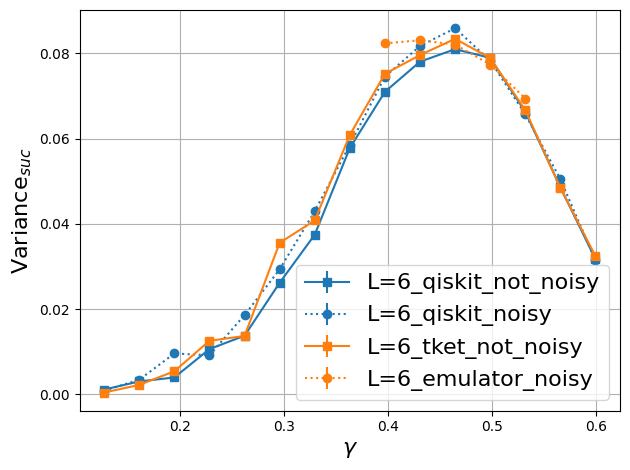

In [18]:
# %matplotlib qt

prop_cycle = pl.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

pl.figure(1)


##### Qiskit data ###
data=load_data('../../Weak measurements/data/sep_data/seed=1_all_qubits_special_scrambled')
L_list = [6,8,10,12,14,16][:1]
plot_success_binder(data,L_list,marker='s',N_samples=-1,color = colors[0],ls='-',
                    extra_label='_qiskit_not_noisy')

data=load_data('../../Weak measurements/data/sep_data/seed=1_all_qubits_special_scrambled_noisy')
L_list = [6,8,10,12,14,16][:1]
plot_success_binder(data,L_list,marker='o',N_samples=-1,color = colors[0],ls=':',
                    extra_label='_qiskit_noisy')


data=load_data('data/tket_sep_data/seed=1_all_qubits')
L_list = [6,8,10,12,14,16][:1]
# plot_success_ent(data,L_list,charge_fac=0,marker='s')
plot_success_binder(data,L_list,marker='s',N_samples=500,color=colors[1],extra_label='_tket_not_noisy')

data=load_data('data/emulator_sep_data/seed=1_all_qubits_noisy')
L_list = [6,8,10,12,14,16][:1]
plot_success_binder(data,L_list,marker='o',N_samples=-1,color = colors[1],ls=':',
                    extra_label='_emulator_noisy')



pl.tight_layout()
pl.grid(which='both')
# pl.xlim(0.38,0.55)
# pl.ylim(-2,1)

### Plotting entropy

In [10]:
def plot_success_ent(data,L_list,charge_fac = 0,N_samples=-1,marker='o',color=None,ls='-',extra_label=''):
    ent = {}
    err = {}
    for L in L_list[:]:
        ent[L] = []
        err[L] = []
        p_list = list(data[L].keys())
        for p in p_list:
            tempQ = list(data[L][p][L//2])[:N_samples]
            tempQ2 = list(data[L][p][L//2-1])[:N_samples]
            print("L=",L,"p=",p,"data_size:",len(tempQ),len(tempQ2))
            # ent.append(np.sum(np.array(suc_list)>0.5)/len(suc_list))
            ent_list = np.array([(-x*np.log(x) - (1-x)*np.log(1-x)) if 0<x<1 else 0 for x in tempQ2+tempQ])
            ent[L].append(np.average(ent_list))
            err[L].append(np.std(ent_list)/(len(ent_list)-1)**0.5)

        if color is None:
            pl.errorbar(np.array(p_list)/(np.pi/2),ent[L],yerr=err[L],ls=ls,marker=marker,label='L='+str(L)+extra_label,color=color)
        else:
            pl.errorbar(np.array(p_list)/(np.pi/2),ent[L],yerr=err[L],ls=ls,marker=marker,label='L='+str(L)+extra_label,color=color)

    pl.xlabel(r'$\gamma$',fontsize=16)
    # pl.ylabel(r'$\langle p \rangle_{suc}$',fontsize=16)
    pl.ylabel(r'$ p_{suc}$',fontsize=16)

    pl.legend(fontsize=16)
    pl.tight_layout()

L= 6 p= 0.2 data_size: 299 299
L= 6 p= 0.253 data_size: 299 299
L= 6 p= 0.306 data_size: 299 299
L= 6 p= 0.359 data_size: 299 299
L= 6 p= 0.412 data_size: 299 299
L= 6 p= 0.465 data_size: 299 299
L= 6 p= 0.518 data_size: 299 299
L= 6 p= 0.571 data_size: 299 299
L= 6 p= 0.624 data_size: 299 299
L= 6 p= 0.677 data_size: 299 299
L= 6 p= 0.73 data_size: 299 299
L= 6 p= 0.783 data_size: 299 299
L= 6 p= 0.836 data_size: 299 299
L= 6 p= 0.889 data_size: 299 299
L= 6 p= 0.942 data_size: 299 299
L= 6 p= 0.2 data_size: 299 299
L= 6 p= 0.253 data_size: 299 299
L= 6 p= 0.306 data_size: 299 299
L= 6 p= 0.359 data_size: 299 299
L= 6 p= 0.412 data_size: 299 299
L= 6 p= 0.465 data_size: 298 298
L= 6 p= 0.518 data_size: 299 299
L= 6 p= 0.571 data_size: 297 298
L= 6 p= 0.624 data_size: 296 299
L= 6 p= 0.677 data_size: 296 299
L= 6 p= 0.73 data_size: 295 298
L= 6 p= 0.783 data_size: 298 298
L= 6 p= 0.836 data_size: 291 297
L= 6 p= 0.889 data_size: 293 295
L= 6 p= 0.942 data_size: 297 298
L= 6 p= 0.2 data

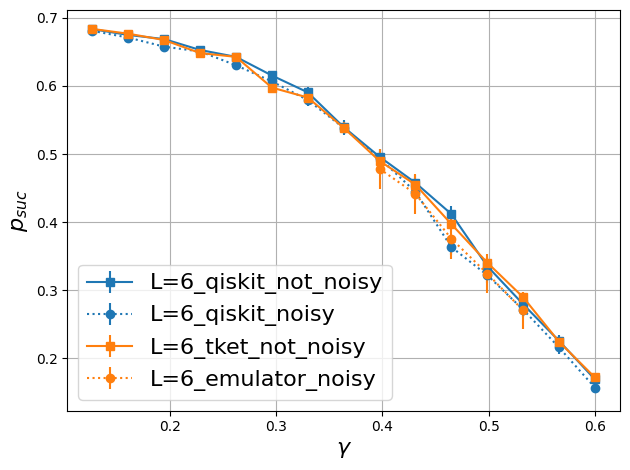

In [19]:
# %matplotlib qt

prop_cycle = pl.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

pl.figure(1)



##### Qiskit data ###
data=load_data('../../Weak measurements/data/sep_data/seed=1_all_qubits_special_scrambled')
L_list = [6,8,10,12,14,16][:1]
plot_success_ent(data,L_list,marker='s',N_samples=-1,color = colors[0],ls='-',
                    extra_label='_qiskit_not_noisy')



data=load_data('../../Weak measurements/data/sep_data/seed=1_all_qubits_special_scrambled_noisy')
L_list = [6,8,10,12,14,16][:1]
plot_success_ent(data,L_list,marker='o',N_samples=-1,color = colors[0],ls=':',
                    extra_label='_qiskit_noisy')




data=load_data('data/tket_sep_data/seed=1_all_qubits')
L_list = [6,8,10,12,14,16][:1]
# plot_success_ent(data,L_list,charge_fac=0,marker='s')
plot_success_ent(data,L_list,marker='s',N_samples=500,color=colors[1],extra_label='_tket_not_noisy')

data=load_data('data/emulator_sep_data/seed=1_all_qubits_noisy')
L_list = [6,8,10,12,14,16][:1]
plot_success_ent(data,L_list,marker='o',N_samples=-1,color = colors[1],ls=':',
                    extra_label='_emulator_noisy')







pl.tight_layout()
pl.grid(which='both')
# pl.xlim(0.38,0.55)
# pl.ylim(-2,1)